In [34]:
from arcgis.gis import GIS
# gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123', verify_cert=False)
gis = GIS('https://www.arcgis.com',"arcgis_python","P@ssword123")
portal_gis = GIS('https://datascienceqa.esri.com/portal','portaladmin','esri.agp')

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
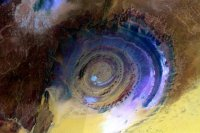

In [36]:
def exact_search(title, owner_value, item_type_value):
    final_match = None
    search_result = gis.content.search(query= title + ' AND owner:' + owner_value, item_type=item_type_value, outside_org=True)
    
    if "Imagery Layer" in item_type_value:
        item_type_value = item_type_value.replace("Imagery Layer", "Image Service")
    elif "Layer" in item_type_value:
        item_type_value = item_type_value.replace("Layer", "Service")
    
    for result in search_result:
        if result.title == title:
            final_match = result
            break
    return final_match

landsat_item = exact_search('Multispectral Landsat', 'esri', 'Imagery Layer')
landsat_item

In [3]:
landsat = landsat_item.layers[0]

In [10]:
renderer_storm = {
                    "renderer": "autocast",
                    "type": "simple",
                    "symbol": {
                        "type": "esriPMS",
                        "url": "65d5289c410e0b419e40d00ed4bcb534",
                        "imageData": "iVBORw0KGgoAAAANSUhEUgAAAB4AAAAkCAYAAACe0YppAAAAAXNSR0IB2cksfwAAAAlwSFlzAAAOxAAADsQBlSsOGwAABvZJREFUWIXtl22MFVcZx39zZua+7OzKBS5b2aWUZZGFbYuutFhLS5PlQysJrcH6gZqIL/2g3zAxaY2xoTEt/aTGapumanxJJaVGKragXamJqbWEWIHKlt1SLmx6F9hOYJfds3dezjnjh5m73L3AQmJMv/gkk3Nnznme3/k/z5lz5jp8ROb8HwzAzm2FO6zc91pE7oG8nVvl2LbtCBvHEghLzBpqEoNKNEobIh0TG3Ssg3cDE718SJgn+M6vgusCd+14qPsGbQ+0tbV2FVo9WgoFXNvFtW0cYSMsC8uyAEiSBJ0YtNHEWhNrRaBiOwiCW5DyljUXJ7dO7njo3sqO374/N3jntkIpEAMtCxZ05QoFHNuBBKyUkl5YWVuXnF1JAgmQgHBsXK9Iq2N18+GFAXZu621WPgu8pqYfzbcUumzbgsSkUZKExGiwLJIkAQwJFjqKCYOIxErAFSAsTIMPJNi2wM67XSsnpx4ZhsevClZabRE5gTYGYzRGCwwWxrIwlsFKAEsQjE+yumMZ92/YgAxr/PTA74iLNkZrjNZgDGiN1hpyNs4kW5gLjEpWG2FjtMFYBoVBoBEIRKIxIsERCe7HWjh+vor/t738YOt2BqsV/nj8LXAExhiU1sQ6nTyWjTKmd+4aG+NgNFpbxBYILBQgABKDFYO2wOiERGm6O3oAaCu0oOIYsIkmJgnimFiAtkEnmtioyxbx7FQbhVYxJAk2oJIUiLaJpkM657ezsLVEx/xF9N20ks+uWIMymgPHDmKshGh8nE/euIoHb+9n+NwITw/sBteAMs3cJsVaobQGIEozgA6g4BRZv2otXYs6cYXNdBTwzsgJhkZPc+LcB1QunEHkcuiCw8HTgyxv7+Cb/Q+itOap115Iaz4XOFYGHcfpwEhjYsNX7t7MF9ZtpNxWmuUYa8V7Z0ewgPNT4wydOc10HOEKm66FHQBsWrOe7//h50RKXYdiFYNWEMHOL32LjTevu8wJwLUdejuX09u5nG0bNlO9MIZ/cZyFbSWWLGgHwMsXQKlrK45UjBtHqMjw3fu/PgNVWnNBXkQbQ1uxBS9fvCxQ5/x2Oue3z3p2cqxKpA1hVr45FBviKOK2jlV8ecNmDp86zsuH/srQ6Gkmpi8yFQZoo+hZvIzPfOJW7urpY/WSbkS2hTbaZE2y46VnwTIQx3ODw1jDVI2HN27hR6/8huEzI9zXdycP929hQes8Ri+M8drhf/Dcn3fxz8ogP973Aj2Ll3HXqj5u676ZpYs6COOIf518l18c+D2D506DI0BfA0wcs3zRMl5/5y20Ntyz+tMMfVDhyMnjrFnWwwPr+llx31JuvWkF33j2cSg6HDt3kmPVE/xk/y5cBLFRRGhwbEKhQWlq6hqpriWaoDbNnjf/QiHnsOuNV8EWIGwwmvdGT/Htz3+Nu1evZW13L2+8fxiEAGOIHIgSBUITGlKViU4PEH2tVa0UleoItBYg3YjIAzll05YrIoPpmaFL5rcTBWGayuywChMDaNCkrTHUEuBailE6rrU6LnFMUQBGEKKZly+y97HnuHHR4pmhB4cOEyZpKpk5JTXo9NWpGcBkfUZN02TNiv9NQB9unlo266IFY5NnGXj772xZfy/jUxM8vffXHD11HFw79TMZFFKFdTMKtAbF0FxgC6P2ENCX3QE2tbRh+y+fYvvPnkhvHCi6Dmid9tchM/tEQxYCBUbtqUck62kEC7l/+Hk+t/KrnqALx5lRkfbWR2fK4qa6NW9ORoECOV2rMFB5PvM29QCzwIDH0eFH6en6IXm3A8e5+neocNLgVzKVQgnjKkOVRwAPuEi6ZC8D2+VyudWv+pEMK4/R4W1iXulTnptbjg04bvMh2gQDVAwaZBydYmL8bUblPnzicrnc6vu+mymOm8F11QIfgy/3g/yT9Lwy7cWl3g35ftpyK8m5dd9LFgGT0bA8F77OWG0EKX2y9TwT81KNaQYnvu/XPM+bklI6QA4QSDlKRZ6RFQ7SW97kfTz/RfK5S15hhDwbvsSgv68epwEaeZ435ft+LUvxzJpvBGtgvFQqOYAECoArpazP2GbQ3y2dcidl7sTOPPzwTQb93Vyqn/E8r57SoFQqTUgpx7O86KuBJ6rVagSczxQ7gA3YnZ2dThiGBf+o/yR3lPfSkhdMh4aj/pPlcvnDfD4fVKtVBWgppSateiSlDIDpbCJXVAwQZgOmMuBMfarVqg24wBghL+KGWwl5ETjm+349cD2d9c983fC7cWuZXeMGJysLVF8QVnYJYMoLa8/IfHGrF9aekTCWqTMNMbhCO8uu9pY2OtWrCWn6Azkoj3B70chBeQQIsjj196tx/FXtev6mNgaJsnaSQ759hefN4/8r8P/EPjLwfwA4z4jv4m7XCgAAAABJRU5ErkJggg==",
                        "contentType": "image/png",
                        "width": 22,
                        "height": 27,
                        "angle": 0,
                        "xoffset": 0,
                        "yoffset": 0
                    },
                    "label": "tropical cyclone",
                    "description": ""
                }

renderer_wildfire = {
                        "renderer": "autocast",
                        "type": "simple",
                        "symbol": {
                            "type": "esriPMS",
                            "url": "b68774e72a946a4b6311e7e41d14ddaf",
                            "imageData": "iVBORw0KGgoAAAANSUhEUgAAABgAAAAcCAYAAAB75n/uAAAAAXNSR0IB2cksfwAAAAlwSFlzAAAOxAAADsQBlSsOGwAABJVJREFUSIm9ll+IFVUcxz8zc+f+G+/u2t7dYu9Ku5arqQlKRiypPdRDBgYbUUagUQhihVD6EIYWqQ+9BSG5L0o9maUVRhBBJAUhZAluslSbuVd097rd3fXsnT/nnOnhzL3tqnd7qQ4MA79zzvdzzvc3vx+T4j8eqf8d8PsWslZp7euR4z6uncKyOJ11sG2wbMAGNMQatAQlscKaspT/sytnTnL13P6eo/jzAqKu1UMt+UJvh5cjm81jZbJguwZgWRDHECtQElRE7NuO77srp4W9cqq4ajOcu7spYOSlvn09ba29uC44NmgNCiCmWgu4pjPEUcDiFhs7jkGDFUPOhlw+Taebv2tkR2lv77vlN24JUHFqAG1cQGmwNOiYUEqu+bBoy14mjr6KHafNvI6TN6AUaIVS6QGgCUBxD1qBiowlyvg8KSJuW7+VdHs3OQdQMWadNOJaJQ+omOXNcxDLFEqB5STX0KgoYkqm6Fm5HgAtJUgaSUZKkBFInRxoruZcQBiBXwNHg6OIHZfxsIZTKOHkCgBMsoDUn2NcmZF0PbuPmSOv0JGpJ11BENIcEAGhAkdBCqJIkd/0GuKz95DVMVILb6dz08tMDO6krf8JvOX9hFpBlIgrCTHzAFRorhwDsYNDipb7HyMY/QVx/ltaHxwgv2QNwcYdZLuXmDMFgdkr65YF8wGAQJqoAzIGB8gvXUtw6UJj2cKHnjL1AFSFpBOShEfGhaaAmQDygJNmWsH0iofpAvJ99+Gt6DeilmXWJu/unYcYPfgM3TlM8sPaPACd5EGGVH0oPvq80XLTDdFofBS3o7uxJbN4FUEtMEoyeZoCZM0ALAh9SJf+rno1WcFpLSLOfEnbxucaccuyiSVQt35eQASEgA22BC2mcFrbAZj+5iRh+TdAo6rjOG0d5tK+wNY1kDnQtaS1NAFYEWfxa6sBeoGxrfdS/OQqlpumMriPxQQEEi4P/ciid75AiykmNi+hN4WpH51oNAFY0ucEWVZjm0DRhj9e6KfwyNOkS0sJR77nUgCF9juYeP9tJk99QI9tWhY6ccjnhDHZVMRsQGrXGTH40TrvzYxrAjbQdeVXpo/up9OGrAN9Lkx/fZzgq+N0u0bJeAWBgl1nxGCiG90IcE+BN3Sdy90Zuha4kHMgDbQnAvVTFoBCvV0pqAHXIxgNRPkUeMDUrQDpYrHYsuZsZQ+mvqx1HsW37vS2LvPo63TmJm9MwQXB8J6L4shpQSWxRBWLxZZKpXINmLkRoCqVSg0QmIPbpwWXNwyJg4f62Djg8WRnsnpMwseCD7cP83kiHCf3CRONxrc0GxACVc/zykAWcIUQNuBuH+ZYbx+lB7L0A5z1+W77MMcSGyLP8+ol6gshqonWTYAImBRCjCQ3SAFOqVTKBEGQ3T1cOXB8OZ8C7B7mQLFYHM9kMn65XA6EEIqkUQBVZnWk2QCNyVf9r8ACKJfLNmBXIHX+orcB4BziByoVyZzUNxr1nIZ9q/+ixsIYHAvkYUhvA78sxE/JnH8YUtuShmvdVL/zAxqjvnFb4umLMF2fq8fmE/9HwL8x/gIVox144tSrDwAAAABJRU5ErkJggg==",
                            "contentType": "image/png",
                            "width": 18,
                            "height": 21,
                            "angle": 0,
                            "xoffset": 0,
                            "yoffset": 0
                        },
                        "label": "wildfires",
                        "description": ""
                    }


renderer_volcano = {
                        "renderer": "autocast",
                        "type": "simple",
                        "symbol": {
                            "angle": 0,
                            "xoffset": 0,
                            "yoffset": 0,
                            "type": "esriPMS",
                            "url": "d8153a3e-3a2a-4cf5-859e-782cd6578e20",
                            "width": 22.5,
                            "height": 22.5,
                            "imageData": "iVBORw0KGgoAAAANSUhEUgAAAEEAAABBCAYAAACO98lFAAAACXBIWXMAABJ0AAASdAHeZh94AAAAB3RJTUUH4gofEhYRvBitegAAAAd0RVh0QXV0aG9yAKmuzEgAAAAMdEVYdERlc2NyaXB0aW9uABMJISMAAAAKdEVYdENvcHlyaWdodACsD8w6AAAADnRFWHRDcmVhdGlvbiB0aW1lADX3DwkAAAAJdEVYdFNvZnR3YXJlAF1w/zoAAAALdEVYdERpc2NsYWltZXIAt8C0jwAAAAh0RVh0V2FybmluZwDAG+aHAAAAB3RFWHRTb3VyY2UA9f+D6wAAAAh0RVh0Q29tbWVudAD2zJa/AAAABnRFWHRUaXRsZQCo7tInAAADf0lEQVR4nO2aW08TQRTH/9OiDSIi6AMECBCCERNvGH3gg5j47CfwK/iqREm8PQDGRALRgJrwoCjBWGqlQRMg3FuupdCWlrWUclE4PhAa1G7o7s7srnH+ySTN7uyZs789c3bmbBkR4X+Xw2oH7CAJARICAAkBgIQAQEIAICEAkBAASAgAJAQA/xAEjz9Gze5ZYowRY4xa+uZoemWdy5qf2X3vMBdLUeXpPNXzHn8M9dVFzMgYtofAGDvUwdFQArUl+bpB2BpCNgD2RUS6Idg2J3j9cU1PJxDVnx9sC6G+5pSm/kvKpu6xbAlhbHlN81M9dtSpezxbQugZjWjqf7/bj7qKk/rfEERkWfPNxOn553lyT67Q/rHe8SgByNie9E7TaCiR7huIJMkfTpJRPywD0OqdV71ZtSbKF0sAzERTmgG8+RYSBsGSnKBsbGm+5kzJcQGe7MkSCK4c7Zn8bLH+FeFhsgTCn0vcBz0BEBEjIjYUVNDWv5A+1+qdBxlYDWYlqxJjx9fF9HzvHgkLm++2zQkAcLG8IP17KrxulRsALN5AHdwgLcRTKCvMFRv2KrLNitEbiFs2tmWRMDCr0NWqwt+OCU+AKrIsEozs+njL1EhYVDZpZ4fAGLCS3EYsuQUHY9glIM/lQHFBLpwOBsaAchPzg2kQ+qZiNPGoJuv++TeGcP1amSkgTJsOWgAAwFrbBUGe/C3bvB0yaWxJe3FFj0yB4PHHdN2MNxDj7UpGmQJh/KG2qbAv6qjj7ElmCYcwHTH2lcg9uSJ8SgiH8HEiauj6ycdnOHmiLqEQQsomUafxkB4OJoRGg1AIHzRWjdXka6jkYkdNwiCElA368fISN3sDs6vCokEYhK7BZa72Bhurudo7KCEQBoPfyfn6Cne7b4eXhUSDEAgDDVUizGKx5RyCqxvcQXCH0NYfFJrJ390u5W6TK4ThxQSl2sVvfLqGwlxBc4Xgu1vJ05yqwk9rMRLit7niBqH5VpGpdbovdyq42eICock9Z0mhkhd4wxDa+4PEOi/z8EWXeIAwBOGFL0jrJiTCw9T4PmAIhO4aY9OnWWKvzNnvZ6ub9+K6apK6IqF7JGI7AADwzDOv64nqioSp8BopqZ9wHXGCYe+rqtXa3tmFK8eB86UnNEeDrf/MaZZsXW02SxICJAQAEgIACQGAhABAQgAgIQCQEAAAvwAjo+0i0UboSwAAAABJRU5ErkJggg==",
                            "contentType": "image/png"
                        }
                    }

renderer_var = {  "renderer": "autocast", #This tells python to use JS autocasting
                  "type": "simple",  # JS type of new SimpleRenderer()
                  "symbol": {
                    "type": "point",  #JS type of new PointSymbol3D()
                    "symbolLayers": [{  
                      "type": "object",  #JS type of new ObjectSymbol3DLayer()
                      "resource": { "primitive": "sphere" },
                      "color": "red",
                      "width": 50000
                    }]
                  }
               }
    
renderer_dict = {
    "Tropical Cyclones": renderer_var,
    "Wildfires": renderer_wildfire,
    "Volcano": renderer_volcano
}

In [37]:
import json
import requests
import pandas as pd

def create_all_fs_from_json(url, disaster_type, add_to_map=None, save_to_fc = True):
    response = requests.get(url)
    json_data = json.loads(response.text)
    item_list = []

    for event in json_data["events"]:
        if disaster_type in event["title"]:
            
            try:
                resp_event = requests.get(event["link"])
                json_event = json.loads(resp_event.text)
                r = json.dumps(json_event["geometries"])
                df = pd.read_json(r, orient=",")
                df[['coordinates_x', 'coordinates_y']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)
                fc = portal_gis.content.import_data(df, locationtype="coordinates",
                                        longitude_field="coordinates_x",latitude_field="coordinates_y")
                if add_to_map is not None:
                    add_to_map.add_layer(fc, {"title": event["title"]})
                if save_to_fc:
                    item_properties = {
                        "title": json_event["title"],
                        "tags" : disaster_type,
                        "snippet": json_event["categories"][0]['title'],
                        "description": json_event["sources"][0]['url'],
                        "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
                        "type": "Feature Collection",
                        "typeKeywords": "Data, Feature Collection, Singlelayer"
                    }
                    item = portal_gis.content.add(item_properties)
                    item_list.append(item.itemid)
                print(event["title"], event["link"], "... Added")

            except Exception:
                print(traceback.format_exc())
                print(event["title"], event["link"], "... Skipped")
    return item_list

In [27]:
from arcgis.mapping import WebMap

def create_wm_from_list(fc_list, disaster_type, wm_item = None):
    if wm_item is None:
        wm = WebMap()
    else:
        wm = WebMap(wm_item)

    for fc in fc_list:
        new_item= portal_gis.content.search(fc)[0]
        wm.add_layer(new_item, options={'title':disaster_type})

    web_map_properties = {'title':disaster_type + " WM",
                         'snippet':'This web map contains multiple '+ disaster_type + ' FS',
                         'tags':'ArcGIS Python API'}

    # Call the save() with web map item's properties.
    web_map_item = wm.save(item_properties=web_map_properties)
    return web_map_item

In [ ]:
map2 = gis.map('USA')

disaster_type = "Volcano"
fc_list = create_all_fs_from_json("https://eonet.sci.gsfc.nasa.gov/api/v2.1/events", disaster_type, map2, False)

web_map_properties = {'title': "Natural Disasters Feature Service Collection",
                      'snippet':'This web map contains multiple '+ disaster_type + ' FC',
                      'tags':'ArcGIS Python API'}

# Call the save() with web map item's properties.
map2.save(item_properties=web_map_properties)

In [ ]:
create_wm_from_list(fc_list, disaster_type)

In [38]:
map3 = gis.map('USA')

disasters = ["Tropical Cyclone","Wildfires"] #"Volcano"
wm3 = None

for disaster_type in disasters:
    fc_list = create_all_fs_from_json("https://eonet.sci.gsfc.nasa.gov/api/v2.1/events", disaster_type, map3, False)
    # wm3 = create_wm_from_list(fc_list, disaster_type, wm3)

web_map_properties = {'title': "Natural Disasters Feature Service Collection",
                      'snippet':'This web map contains multiple '+ disaster_type + ' FC',
                      'tags':'ArcGIS Python API'}

# Call the save() with web map item's properties.
map3.save(item_properties=web_map_properties)

Tropical Cyclone Joaninha https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4153 ... Added
Tropical Cyclone Veronica https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4151 ... Added
Wildfires - Paredones, Chile https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4154 ... Added
Wildfires - Southern Switzerland https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4149 ... Added
Wildfires - Northwestern South Africa https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4150 ... Added
Wildfires - Traiguén, Chile  https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4118 ... Added
Wildfires - Sierra Nevada de Santa Marta, Colombia https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4114 ... Added
Wildfires - Southeastern Victoria, Australia https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4113 ... Added
Wildfires - Western Basque Country, Cantabria and Asturias, Spain  https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4112 ... Added
Wildfires - Ercilla and Collipulli,

<Item title:"Natural Disasters Feature Service Collection" type:Web Map owner:portaladmin>

In [ ]:
wm3

In [ ]:
map3

### Use the cells below for debugging purposes

In [ ]:
response = requests.get("https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4154")
json_event = json.loads(response.text)
print(json_event["title"])
print(json_event["geometries"])

In [ ]:
import pandas as pd
r = json.dumps(json_event["geometries"])
df = pd.read_json(r, orient=",")

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df[['coordinates_x', 'coordinates_y']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)

In [ ]:
df.head()

In [ ]:
# portal_gis = GIS('https://datascienceqa.esri.com/portal', 'portaladmin', 'esri.agp', verify_cert=False)

In [ ]:
fc = gis.content.import_data(df, locationtype="coordinates",
                                    longitude_field="coordinates_x",latitude_field="coordinates_y")

In [ ]:
map1 = gis.map('USA')
map1

In [ ]:
renderer_var = {  "renderer": "autocast", #This tells python to use JS autocasting
                  "type": "simple",  # JS type of new SimpleRenderer()
                  "symbol": {
                    "type": "point",  #JS type of new PointSymbol3D()
                    "symbolLayers": [{  
                      "type": "object",  #JS type of new ObjectSymbol3DLayer()
                      "resource": { "primitive": "sphere" },
                      "color": "red",
                      "width": 50000
                    }]
                  }
               }

map1.add_layer(fc, renderer_var)

In [ ]:
item_properties = {
    "title": json_event["title"],
    "tags" : "Wildfires",
    "snippet": json_event["categories"],
    "description": json_event["sources"],
    "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"
}
# item = portal_gis.content.add(item_properties)

In [ ]:
map1.save(item_properties)

In [ ]:
wm = WebMap()

wm.add_layer(fc)

web_map_properties = {'title':disaster_type + " WM",
                     'snippet':'This web map contains multiple '+ disaster_type + ' FS',
                     'tags':'ArcGIS Python API'}

# Call the save() with web map item's properties.
web_map_item = wm.save(item_properties=web_map_properties)

In [ ]:
web_map_item